#  Data Analytics Project: Text Analytics and Topic Modelling

https://github.com/mlcurva77/UTS_ML2019_ID10885123/blob/master/ML2019_ID10885123_A2.ipynb

## 1. Overview

Any company or organisation generates a significant amount of documentation to record information about their business. The process of analysing the documents takes a lot of time and resources, which makes it slow and inefficient. Text Analytics helps to resolve this issue. Text Analytics is the automated process of analysing text documents and deriving meaningful information from unstructured data.

This report aims to analyse a portfolio of documents from Ernst and Young (EY) to learn about the company’s values and what is important to them when working with other organisations.  Text Analytics and Topic Modelling will be used to examine and derive meaningful insights from the documents. The Natural Language Toolkit (NLTK) was used for performing Text Analytics and Gensim for Topic Modelling. 

## 2. Data Description

There were twenty-eight (28) text documents from EY with varying content and sizes. All documents were loaded in GoogleColab from the Google Drive directory. The list of files is shown below with the corresponding number of words per document.

| Number of Words | File Name |
|---| --- |
| 713 | 01_AFR1.txt
| 751	| 01_AFR2.txt
| 1360	| 01_AFR3.txt
| 906	| 01_AFR4.txt
| 399	| 02_EY1.txt
| 694	| 02_EY2.txt
| 3577	| 02_EY3.txt
| 12457	| 02_EY4.txt
| 6403	| 02_EY5.txt
| 7583	| 02_EY6.txt
| 14264	| 02_EY7.txt
| 821	| 02_EY8.txt
| 1460	| 03_EY1.txt
| 949	| 03_EY10.txt
| 1305	| 03_EY2.txt
| 1044	| 03_EY3.txt
| 515	| 03_EY4.txt
| 560	| 03_EY5.txt
| 865	| 03_EY6.txt
| 1371	| 03_EY7.txt
| 1245	| 03_EY8.txt
| 1201	| 03_EY9.txt
| 3603	| 04_EY1.txt
| 402	| 05_UNSW1.txt
| 1345	| 05_UQ1.txt
| 697	| 05_USYD1.txt
| 578	| 05_UTS1.txt
| 856	| 05_UWA1.txt

## 3. Text Analytics using NLTK

This section illustrates how to use the classes in NLTK for text transformation. 

All the documents are unstructured, which require to be transformed for analysis. NLTK was mainly used to explore and understand the datasets. 

Each document needs to be tokenised because the data is unstructured. Tokenisation is the process of breaking down a text paragraph into sentences or words. The following transformation was performed on the documents after the documents were tokenised.

* Removal of punctuation using the string package.
* Change words to lower case.
* Removal of common English stopwords. Stopwords are considered noise in the data and do not add value to the analysis. Some examples of stopwords includes is, am, are, this, a, an, the, etc.
* Stemming and Lemmatization. Stemming and Lemmatization are language normalisation process, which reduces words to their word root word.

### 3.10 Loading the Packages

The following packages were used for Text Analytics and Topic Modelling;

*   NLTK - The Natural Language Toolkit (NLTK) is an open source Python library for Natural Language Processing.
*   re - This module provides regular expression matching operations similar to those found in Perl.
* numpy - NumPy is the fundamental package for scientific computing with Python. 
* Gensim - Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora.
* pyLDAvis - Python library for interactive topic model visualization.
* matplotlib - plotting library for the Python programming language and its numerical mathematics extension NumPy.  
* Using spaCy for POS tagging. spaCy is a package used for tagging, parsing and named entity recognition.



In [2]:
#Loading NLTK
import nltk
!pip install -q nltk==3.4.3

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *

# spacy for lemmatization
import spacy

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Plotting tools
!pip install pyLDAvis
import pyLDAvis
import pyLDAvis.gensim  
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


### 3.12 Connecting to GoogleColab and Google drive

In [3]:
inGoogleColab = True

from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive/


### 3.13 Loading the EY documents for analysis and Topic Modelling.

In [4]:
import os
from nltk.corpus import PlaintextCorpusReader

# Setting the directory path to my google drive
folderpath_base = '/content/drive/My Drive/Docs'

# .txt file names as file IDs
file_ids = ".*.txt"
corpus = nltk.corpus.reader.PlaintextCorpusReader(folderpath_base, file_ids,encoding='latin-1')

#print(corpus.fileids())
print(corpus)

<PlaintextCorpusReader in '/content/drive/My Drive/Docs'>


In [5]:
# for-loop through file IDs and print out word count. 
# Listing the EY filenames to be used for analysis.

for f in corpus.fileids():
    print(len(corpus.words(f)), f)

713 01_AFR1.txt
751 01_AFR2.txt
1360 01_AFR3.txt
906 01_AFR4.txt
399 02_EY1.txt
694 02_EY2.txt
3577 02_EY3.txt
12457 02_EY4.txt
6403 02_EY5.txt
7583 02_EY6.txt
14264 02_EY7.txt
821 02_EY8.txt
1460 03_EY1.txt
949 03_EY10.txt
1305 03_EY2.txt
1044 03_EY3.txt
515 03_EY4.txt
560 03_EY5.txt
865 03_EY6.txt
1371 03_EY7.txt
1245 03_EY8.txt
1201 03_EY9.txt
3603 04_EY1.txt
402 05_UNSW1.txt
1345 05_UQ1.txt
697 05_USYD1.txt
578 05_UTS1.txt
856 05_UWA1.txt


In [6]:
# Corpus size in number of words
print(len(corpus.words()))

67924


### 3.14 Tokenisation
The documents required to be tokenised to break down the paragraphs into sentences or words. The **words** and **sents** functionalities in NLTK are used to perform tokenization.

In [7]:
# Words breaks text paragraphs into words. Note that punctuations are treated as individual words in tokenization.

tokenized_word = corpus.words()
print(tokenized_word[:60])

['US', 'business', 'leader', 'Kay', 'Koplovitz', 'forges', 'new', 'ground', 'for', 'female', 'entrepreneurs', 'by', 'Joanne', 'Gray', 'Women', 'in', 'science', 'and', 'technology', 'are', 'gaining', 'a', 'higher', 'profile', 'in', 'Australia', 'as', 'entrepreneurs', ',', 'says', 'Kay', 'Koplovitz', ',', 'a', 'leading', 'successful', 'businesswoman', 'in', 'the', 'US', 'and', 'founder', 'of', 'USA', 'Network', '.', 'Her', 'successful', 'incubator', ',', 'Springboard', 'Enterprises', ',', 'launched', 'in', 'Australia', 'five', 'years', 'ago', ',']


### 3.15 Removal of punctuation.
Punctuations do not add value to the text analysis so these needed to be removed. The **string.punctuation** is a pre-initialized string used as string constant in Python. The **string.punctuation** will give all sets of punctuation.

In [8]:
#
import string
exclude = set(string.punctuation) 
print(exclude)

nopunctuation_word=[]
for w in tokenized_word:
    if w not in exclude:
        nopunctuation_word.append(w)
        
print("nopunctuation:",nopunctuation_word[:60])

{'>', '@', '.', '-', '_', ':', '(', '^', "'", '|', '?', ']', '!', '=', '~', '*', ')', '\\', ',', '#', '$', '{', ';', '<', '/', '`', '}', '[', '&', '+', '%', '"'}
nopunctuation: ['US', 'business', 'leader', 'Kay', 'Koplovitz', 'forges', 'new', 'ground', 'for', 'female', 'entrepreneurs', 'by', 'Joanne', 'Gray', 'Women', 'in', 'science', 'and', 'technology', 'are', 'gaining', 'a', 'higher', 'profile', 'in', 'Australia', 'as', 'entrepreneurs', 'says', 'Kay', 'Koplovitz', 'a', 'leading', 'successful', 'businesswoman', 'in', 'the', 'US', 'and', 'founder', 'of', 'USA', 'Network', 'Her', 'successful', 'incubator', 'Springboard', 'Enterprises', 'launched', 'in', 'Australia', 'five', 'years', 'ago', 'trains', 'women', 'founders', 'with', 'potentially', 'high']


### 3.16 Frequency Distribution (before transformation)
The FreqDist class is used to encode “frequency distributions”, which count the number of times that each outcome of an experiment occurs. I'm using FreqDist to plot the frequency distribution of the most common words prior to performing additional transformation in the text. The most common words are shown below. Notice that the common stopwords (i.e. the, and, to, etc.) appear in the list.

In [9]:
from nltk.probability import FreqDist

fdist = FreqDist(nopunctuation_word)
print(fdist)
fdist.most_common(10)

<FreqDist with 7473 samples and 60961 outcomes>


[('the', 2501),
 ('and', 2416),
 ('to', 1785),
 ('of', 1748),
 ('in', 1046),
 ('a', 989),
 ('EY', 636),
 ('for', 593),
 ('\x92', 539),
 ('is', 532)]

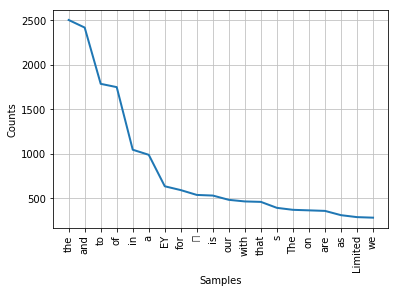

In [10]:
# The graph below shows the most common words across all 28 documents prior to performing additional transformation in the text.

import matplotlib.pyplot as plt
fdist.plot(20,cumulative=False)
plt.show()

### 3.17 Remove common english stopwords.
Convert all words to lowercase. The lower() methods returns the lowercased string from the given string. It converts all uppercase characters to lowercase. Then, remove the common english stopwords to remove the noise from the data. Add any additional stopwords in your list as required.

In [11]:
from nltk.corpus import stopwords

# Convert all words to lowercase.
lower_word = [word.lower() for word in nopunctuation_word]
print("lowercase:", lower_word[:20])

# Initialise stop_words to contain the commom english topwords.
stop_words=stopwords.words("english")
print("stopwords:", stop_words[:20])

# Add additional words in the stopwords list that do not add value to the analysis.

stop_words.extend(["can", "say","one","way","use","here","I",
                 "also","howev","tell","will","help","also",
                 "much","need","take","tend","even","us","US"
                 "like","particular","rather","said","EY","ey"
                 "get","well","make","ask","come","end",
                 "first","two","help","often","may",
                 "might","see","someth","thing","point",
                 "post","look","right","now","think","'ve ",
                 "'re ","anoth","put","set","new","good",
                 "want","sure","kind","larg","yes,","day","etc",
                 "quit","sinc","attempt","lack","seen","awar",
                 "littl","ever","moreov","though","found","abl",
                 "enough","far","earli","away","achiev","draw",
                 "last","never","brief","bit","entir","brief",
                 "great","lot","include","provide","year","new","help",
                 "includ","one","require","use","make","better",
                 "way","like","across","valu","provide","young","continu",
                 "tropfest","ernst","four","limit","and","however", "\x92", "\x93","\x94",
                 "\x95","\x96","\x97","\x98","\x99","the","in","because","includ","this","those","where","ey","aaditya",
                  "includ","go","get","many","less","year","number","give"])

filtered_word=[]
for w in lower_word:
    if w not in stop_words:
        filtered_word.append(w)

print("nopunctuation:",nopunctuation_word[:20])
print("Filtered:",filtered_word[:20])

lowercase: ['us', 'business', 'leader', 'kay', 'koplovitz', 'forges', 'new', 'ground', 'for', 'female', 'entrepreneurs', 'by', 'joanne', 'gray', 'women', 'in', 'science', 'and', 'technology', 'are']
stopwords: ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his']
nopunctuation: ['US', 'business', 'leader', 'Kay', 'Koplovitz', 'forges', 'new', 'ground', 'for', 'female', 'entrepreneurs', 'by', 'Joanne', 'Gray', 'Women', 'in', 'science', 'and', 'technology', 'are']
Filtered: ['business', 'leader', 'kay', 'koplovitz', 'forges', 'ground', 'female', 'entrepreneurs', 'joanne', 'gray', 'women', 'science', 'technology', 'gaining', 'higher', 'profile', 'australia', 'entrepreneurs', 'says', 'kay']


### 3.18 Stemming and Lemmatization
Stemming is a process of linguistic normalization, which reduces words to their word root word. Lemmatization reduces words to their base word, which transforms root word with the use of vocabulary and morphological analysis.

In [12]:
# Use ps.stem for Stemming.

from nltk.stem import PorterStemmer
ps = PorterStemmer()

stemmed_word=[]
for w in filtered_word:
    stemmed_word.append(ps.stem(w))

print("filtered:",filtered_word[:20])
print("Stemmed:",stemmed_word[:20])

filtered: ['business', 'leader', 'kay', 'koplovitz', 'forges', 'ground', 'female', 'entrepreneurs', 'joanne', 'gray', 'women', 'science', 'technology', 'gaining', 'higher', 'profile', 'australia', 'entrepreneurs', 'says', 'kay']
Stemmed: ['busi', 'leader', 'kay', 'koplovitz', 'forg', 'ground', 'femal', 'entrepreneur', 'joann', 'gray', 'women', 'scienc', 'technolog', 'gain', 'higher', 'profil', 'australia', 'entrepreneur', 'say', 'kay']


In [13]:
# Use lem.lemmatize for Lemmatization.

from nltk.stem.wordnet import WordNetLemmatizer
lem = WordNetLemmatizer()

clean_word=[]
for w in stemmed_word:
    clean_word.append(lem.lemmatize(w,"v"))

print("Stemmed:",stemmed_word[:20])
print("Lemmatized:",clean_word[:20])

Stemmed: ['busi', 'leader', 'kay', 'koplovitz', 'forg', 'ground', 'femal', 'entrepreneur', 'joann', 'gray', 'women', 'scienc', 'technolog', 'gain', 'higher', 'profil', 'australia', 'entrepreneur', 'say', 'kay']
Lemmatized: ['busi', 'leader', 'kay', 'koplovitz', 'forg', 'grind', 'femal', 'entrepreneur', 'joann', 'gray', 'women', 'scienc', 'technolog', 'gain', 'higher', 'profil', 'australia', 'entrepreneur', 'say', 'kay']


In [0]:
#clean_word = [word.lower() for word in lm_word]
#print(clean_word[:100])

### 3.19 Frequency Distribution (after transformation)
The graph below shows the top 20 most common words found in the corpus. Noticed that the words shown are keywords that can provide some insights from the documents. The top five (5) topics are limit, service, business, audit and global.

<FreqDist with 4194 samples and 33517 outcomes>


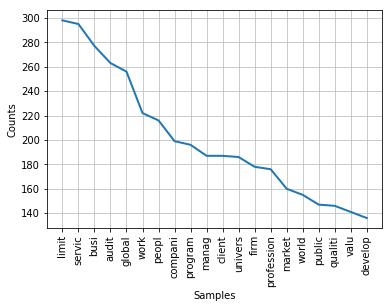

In [15]:
fdist = FreqDist(clean_word)
print(fdist)
fdist.most_common(20)

import matplotlib.pyplot as plt
fdist.plot(20,cumulative=False)
plt.show()

### 3.20 Plotting the word distribution using wordcloud.
Wordcloud is just another way of visualising the top five(5) topics from the EY documents.

[nltk_data] Downloading package webtext to /root/nltk_data...
[nltk_data]   Unzipping corpora/webtext.zip.


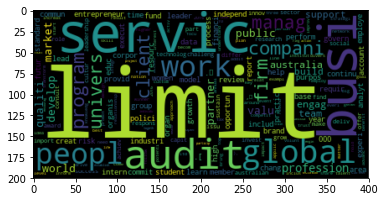

In [16]:
from nltk.corpus import webtext
from nltk.probability import FreqDist
from wordcloud import WordCloud
import matplotlib.pyplot as plt
nltk.download('webtext')
 
data_analysis = nltk.FreqDist(clean_word)
 
filter_words = dict([(m, n) for m, n in data_analysis.items() if len(m) > 1])
 
wcloud = WordCloud().generate_from_frequencies(filter_words)
 
# Plotting the wordcloud
plt.imshow(wcloud, interpolation="bilinear")
 
plt.axis("on")
(-0.5, 699.5, 499.5, -0.5)
plt.show()

## 4.0 Topic Modelling using Gensim
Topic Modeling is a technique to extract the hidden topics from large volumes of text. Latent Dirichlet Allocation(LDA) is a popular algorithm for topic modeling with excellent implementations in the Python’s Gensim package.

This section illustrates how to use Latent Dirichlet Allocation (LDA) from Gensim package to derive insights from the EY documents. The LDA algorithm considers each document as a collection of topics in a certain proportion. And each topic as a collection of keywords, again, in a certain proportion.

Once you provide the algorithm with the number of topics, all it does is rearrange the topics distribution within the documents and keywords distribution within the topics to obtain a good composition of topic-keywords distribution.

### 4.11 Tokenization into sentences and words.

In [17]:
# Tokenized the text into sentences. The sents class in NLTK will create a list of a collection of sentences for each document.

tokenized_sent = corpus.sents()
print(tokenized_sent[0])

['US', 'business', 'leader', 'Kay', 'Koplovitz', 'forges', 'new', 'ground', 'for', 'female', 'entrepreneurs', 'by', 'Joanne', 'Gray', 'Women', 'in', 'science', 'and', 'technology', 'are', 'gaining', 'a', 'higher', 'profile', 'in', 'Australia', 'as', 'entrepreneurs', ',', 'says', 'Kay', 'Koplovitz', ',', 'a', 'leading', 'successful', 'businesswoman', 'in', 'the', 'US', 'and', 'founder', 'of', 'USA', 'Network', '.']


In [19]:
# The logic below will create a list of words from the list of collection of sentences.

def sent_to_words(sentences):
    for sentence in sentences:
        #print(sentence)
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))# deacc=True removes punctuations

tokenized_words = list(sent_to_words(tokenized_sent))

print(tokenized_words[:2])

[['us', 'business', 'leader', 'kay', 'koplovitz', 'forges', 'new', 'ground', 'for', 'female', 'entrepreneurs', 'by', 'joanne', 'gray', 'women', 'in', 'science', 'and', 'technology', 'are', 'gaining', 'higher', 'profile', 'in', 'australia', 'as', 'entrepreneurs', 'says', 'kay', 'koplovitz', 'leading', 'successful', 'businesswoman', 'in', 'the', 'us', 'and', 'founder', 'of', 'usa', 'network'], ['her', 'successful', 'incubator', 'springboard', 'enterprises', 'launched', 'in', 'australia', 'five', 'years', 'ago', 'trains', 'women', 'founders', 'with', 'potentially', 'high', 'growth', 'businesses', 'to', 'raise', 'venture', 'capital', 'with', 'week', 'course', 'and', 'two', 'day', 'boot', 'camp', 'which', 'runs', 'this', 'week']]


### 4.12 Define Bigrams and Trigrams
Bigrams are two words frequently occurring together in the document. Trigrams are 3 words frequently occurring.

Gensim’s Phrases model can build and implement the bigrams, trigrams, quadgrams and more. The two important arguments to Phrases are min_count and threshold. The higher the values of these param, the harder it is for words to be combined to bigrams.

In [20]:
# Build the bigram and trigram models
bigram = gensim.models.Phrases(tokenized_words, min_count=5, threshold=30) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[tokenized_words], threshold=30)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[tokenized_words[2]]])

/usr/local/lib/python3.6/dist-packages/gensim/models/phrases.py:598: UserWarning: For a faster implementation, use the gensim.models.phrases.Phraser class
  warnings.warn("For a faster implementation, use the gensim.models.phrases.Phraser class")


['women', 'are', 'coming', 'up', 'with', 'enormously', 'important', 'disruptive', 'technologies', 'in', 'science', 'she_said']


### 4.13 Remove common english stopwords, make bigrams and lemmatize.
Remove the common english stopwords to remove the noise from the data. Add any additional stopwords in your list as required.

In [0]:
from nltk.corpus import stopwords
stop_words=stopwords.words("english")

stop_words.extend(["can", "say","one","way","use","here","I",
                 "also","howev","tell","will","help","also",
                 "much","need","take","tend","even","us","US"
                 "like","particular","rather","said","EY","ey"
                 "get","well","make","ask","come","end",
                 "first","two","help","often","may",
                 "might","see","someth","thing","point",
                 "post","look","right","now","think","'ve ",
                 "'re ","anoth","put","set","new","good",
                 "want","sure","kind","larg","yes,","day","etc",
                 "quit","sinc","attempt","lack","seen","awar",
                 "littl","ever","moreov","though","found","abl",
                 "enough","far","earli","away","achiev","draw",
                 "last","never","brief","bit","entir","brief",
                 "great","lot","include","provide","year","new","help",
                 "includ","one","require","use","make","better",
                 "way","like","across","valu","provide","young","continu",
                 "tropfest","ernst","four","limit","and","however", "\x92", "\x93","\x94",
                 "\x95","\x96","\x97","\x98","\x99","the","in","because","includ","this","those","where","ey","aaditya",
                  "includ","go","get","many","less","year","number","give","include","return",
                  "australia","china","give"])

In [0]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [23]:
# Remove Stop Words
tokenized_words_nostops = remove_stopwords(tokenized_words)

# Form Bigrams
tokenized_words_bigrams = make_bigrams(tokenized_words_nostops)

# Initialize spacy 'en' model, keeping only tagger component (for efficiency)
# python3 -m spacy download en
nlp = spacy.load('en', disable=['parser', 'ner'])

# Do lemmatization keeping only noun, adj, vb, adv
clean_data = lemmatization(tokenized_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(clean_data[:1])


[['business', 'leader', 'kay', 'koplovitz', 'forge', 'ground', 'female', 'entrepreneur', 'gray', 'woman', 'science', 'technology', 'gain', 'high', 'profile', 'entrepreneur', 'say', 'kay', 'koplovitz', 'lead', 'successful', 'businesswoman', 'founder', 'usa', 'network']]


### 4.14 Create Dictionary and Corpus for LDA model
The two main inputs to the LDA topic model are the dictionary(id2word) and the corpus. Gensim creates a unique id for each word in the document. The produced corpus is a mapping of (word_id, word_frequency).

In [24]:
# Create Dictionary
id2word = corpora.Dictionary(clean_data)

# Create Corpus
texts = clean_data

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Shows the mapping of (word_id, word_frequency).
print(corpus[:3])
print(len(corpus))

[[(0, 1), (1, 1), (2, 2), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 2), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1), (16, 1), (17, 1), (18, 1), (19, 1), (20, 1), (21, 1)], [(0, 1), (5, 1), (9, 1), (18, 1), (21, 1), (22, 1), (23, 1), (24, 1), (25, 1), (26, 1), (27, 1), (28, 1), (29, 1), (30, 1), (31, 1), (32, 1), (33, 1), (34, 1), (35, 1), (36, 2)], [(17, 1), (19, 1), (21, 1), (37, 1), (38, 1), (39, 1), (40, 1)]]
2337


In [25]:
# Print what word corresponds to a given id.
print(id2word[1])

# Human readable format of corpus (term-frequency)
[[(id2word[id], freq) for id, freq in cp] for cp in corpus[:1]]

businesswoman


[[('business', 1),
  ('businesswoman', 1),
  ('entrepreneur', 2),
  ('female', 1),
  ('forge', 1),
  ('founder', 1),
  ('gain', 1),
  ('gray', 1),
  ('ground', 1),
  ('high', 1),
  ('kay', 2),
  ('koplovitz', 2),
  ('lead', 1),
  ('leader', 1),
  ('network', 1),
  ('profile', 1),
  ('say', 1),
  ('science', 1),
  ('successful', 1),
  ('technology', 1),
  ('usa', 1),
  ('woman', 1)]]

### 4.15 Build the Topic Model using LDA.
The corpus and dictionary are now ready to train the LDA model. In addition, the following needs to be provided;
* number of topics
* random state - either a randomState object or a seed to generate one. Useful for reproducibility.
* alpha and eta hyperparameters for sparsity of the topics (both defaults to 1.0/num_topics prior )
* chunksize - the number of documents to be used in each training chunk
* update_every - determines how often the model parameters should be updated 
* passes - the total number of training passes.

In [0]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=10, 
                                           random_state=100, 
                                           update_every=1,
                                           chunksize=15,
                                           passes=30,
                                           alpha='auto',
                                           per_word_topics=True)

### 4.16 View the keywords in the top 10 topics
Below shows the top 6 topics where each topic is a combination of keywords and each keyword contributes a certain weightage to the topic.

lda_model.print_topics() is used to show the keywords for each topic and the weightage(importance) of each keyword.

Example:
Topic 1 - shows that the keywords to this topic are business, opportunity, experience, company, include, community, apply, australia, issue and datum.
The word "business" is the most important word with the highest weight of 0.062 among the keywords.

In [27]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.042*"engineering" + 0.039*"world" + 0.036*"partner" + '
  '0.026*"sustainability" + 0.024*"waste" + 0.023*"rank" + 0.021*"practice" + '
  '0.018*"science" + 0.017*"mathematic" + 0.014*"corporation"'),
 (1,
  '0.057*"program" + 0.049*"firm" + 0.045*"work" + 0.040*"service" + '
  '0.036*"idea" + 0.032*"big" + 0.029*"time" + 0.026*"people" + 0.020*"global" '
  '+ 0.019*"develop"'),
 (2,
  '0.042*"win" + 0.029*"client" + 0.024*"professional" + 0.022*"career" + '
  '0.019*"demonstrate" + 0.019*"step" + 0.019*"purpose" + 0.017*"discipline" + '
  '0.015*"international" + 0.014*"solve"'),
 (3,
  '0.069*"student" + 0.040*"university" + 0.034*"project" + 0.025*"research" + '
  '0.023*"experience" + 0.020*"create" + 0.017*"technology" + 0.014*"support" '
  '+ 0.013*"panel" + 0.012*"role"'),
 (4,
  '0.036*"follow" + 0.028*"accounting" + 0.028*"week" + 0.021*"base" + '
  '0.021*"consider" + 0.020*"information" + 0.019*"price" + 0.017*"offer" + '
  '0.016*"relationship" + 0.015*"interest"'

### 4.17 Compute Perplexity and Coherence Score
Model perplexity and topic coherence provide a convenient measure to judge how good a given topic model is. I have tried different combinations and found that the highest coherence score that I can get is around 0.40.

In [28]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=clean_data, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -9.761178842152672

Coherence Score:  0.46108675350301553


### 4.18 Interactive visualisation of the topics.
The topics from the EY documents were identified using LDA (Latent Dirichlet Allocation). The number of Topics was set to 10. The chart below shows the topic distribution across the entire Corpus. The most prevalent were topics two (2) and ten (10). Topic 2 is about program, firm, work, service and idea. Topic 10 is also about company, financial, opportunity, audit and problem. The rest of the topics are overlapping, which shows that these topics are interrelated.

In [29]:
# Visualize the topics
# Note gensim starts indexing at 0 and pyLDAvis starts at 1. Therefore, topic 10 in pyLDAvis corresponds to topic 9 in Gensim (4.16).

pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word, sort_topics=False)
vis

/usr/local/lib/python3.6/dist-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.008250 -0.053890       1        1   7.854978
1     -0.256039  0.190710       2        1  14.138171
2      0.007897 -0.035174       3        1   8.542023
3      0.002238 -0.101728       4        1  13.829665
4      0.007748 -0.037660       5        1   6.496140
5      0.001861 -0.086181       6        1  10.938071
6      0.001237 -0.039847       7        1   7.420166
7      0.008300 -0.032022       8        1   5.818283
8     -0.004253 -0.030535       9        1  10.456817
9      0.222761  0.226326      10        1  14.505684, topic_info=     Category        Freq          Term       Total  loglift  logprob
0     Default  298.000000      business  298.000000  30.0000  30.0000
137   Default  282.000000       student  282.000000  29.0000  29.0000
107   Default  238.000000       program  238.000000  28.0000  28.0000
194   Default  205.000000          firm  205.000000  27.0000  27.0000
3628  Default  173.000000   scholarship  173.000000  26.0000  26.0000
570   Default  142.000000          team  142.000000  25.0000  25.0000
160   Default  188.000000          work  188.000000  24.0000  24.0000
120   Default  166.000000       service  166.000000  23.0000  23.0000
138   Default  162.000000    university  162.000000  22.0000  22.0000
709   Default  107.000000  organisation  107.000000  21.0000  21.0000
144   Default  150.000000          idea  150.000000  20.0000  20.0000
262   Default  144.000000       company  144.000000  19.0000  19.0000
265   Default  144.000000     financial  144.000000  18.0000  18.0000
1271  Default  140.000000       project  140.000000  17.0000  17.0000
2484  Default  106.000000           win  106.000000  16.0000  16.0000
186   Default  135.000000           big  135.000000  15.0000  15.0000
509   Default   99.000000   engineering   99.000000  14.0000  14.0000
110   Default  123.000000          time  123.000000  13.0000  13.0000
728   Default  123.000000   opportunity  123.000000  12.0000  12.0000
90    Default   90.000000         world   90.000000  11.0000  11.0000
580   Default   83.000000       partner   83.000000  10.0000  10.0000
821   Default   95.000000         award   95.000000   9.0000   9.0000
184   Default  108.000000        people  108.000000   8.0000   8.0000
553   Default  104.000000      research  104.000000   7.0000   7.0000
1130  Default   86.000000         skill   86.000000   6.0000   6.0000
560   Default   70.000000        follow   70.000000   5.0000   5.0000
57    Default   65.000000          head   65.000000   4.0000   4.0000
356   Default   74.000000        client   74.000000   3.0000   3.0000
784   Default   69.000000     encourage   69.000000   2.0000   2.0000
510   Default   93.000000    experience   93.000000   1.0000   1.0000
...       ...         ...           ...         ...      ...      ...
262   Topic10  144.131195       company  144.904510   1.9253  -3.3935
265   Topic10  143.953796     financial  144.727310   1.9253  -3.3947
728   Topic10  122.829063   opportunity  123.602577   1.9244  -3.5534
1285  Topic10   81.483978         audit   82.257423   1.9212  -3.9638
233   Topic10   79.191879       include   79.965271   1.9209  -3.9924
457   Topic10   79.655121       problem   80.445847   1.9208  -3.9865
294   Topic10   75.105049      industry   75.878632   1.9204  -4.0453
256   Topic10   68.971931           tax   69.745422   1.9195  -4.1305
226   Topic10   66.877083          hold   67.650917   1.9191  -4.1614
1675  Topic10   66.009598      analytic   66.783958   1.9190  -4.1744
1161  Topic10   64.618179         study   65.391861   1.9187  -4.1957
253   Topic10   60.918339         issue   61.691673   1.9180  -4.2547
228   Topic10   58.842548        period   59.623016   1.9175  -4.2894
219   Topic10   51.244247           top   52.017586   1.9157  -4.4276
258   Topic10   50.521461    australian   51.295086   1.9154  -4.4418
232   Topic10   47.

# Conclusion

The results of the Frequency Distribution and Word Cloud showed the keywords with the highest count, which could be a representation of the topics relevant to the EY documents. However, this is too high-level, and there could be more 'abstract' topic embedded in the EY documents.

The top keywords from Frequency Distribution and Word Cloud are the following;
* limit
* service
* business
* audit
* global
* work
* people
* company
* program
* manage

Implementing the LDA to identify the top ten topics showed that there are two distinct main topics among the ten topics determined by the model.
The two distinct topics are Topic 2 and 10. 

Topic 2 consists of top 10 keywords such as 'program', 'firm', 'work', 'service', 'idea', 'big', 'time', 'people', 'global' and 'develop'. This topic could be around developing global programs or ideas around people and service.

Topic 10's top keywords are 'company', 'financial', 'opportunity', 'audit', 'problem', 'include', 'industry', 'tax', 'hold', 'analytics'. This topic could mean that financial opportunities, audit, and analytics are also important with EY.

The other eight topics are somehow overlapping, which meant that the topics could be related.
